## Data Science Programming 2

# Final Project 

## Marking scheme 
For Final:
1. Data and task presentation - 10%
2. Data Preprocessing - 20%
3. Model (variety, complexity, tunning) - 20%
4. Imbalance (approaching this issue) - 20%
5. Code quality - 10%
6. Results and Defence - 20%

*Note: add comments and description of the approaches that you use, for example, for resolving the problem of imbalanced data. Write descriptions of techniques that you apply, and you should understand them as well.*

## Task 1

In [1]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import output
output.enable_custom_widget_manager()
from google.colab import output
output.disable_custom_widget_manager()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/task1.csv', sep=';', decimal=",")
df.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3139363536333839,323531,33,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,...,7,0,0,36,7,36,7,0,0,0
1,3437333830323633,343835,31,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,...,18,5,6,52,12,57,18,0,0,0
2,3134323931353339,323531,33,0.00,31.95,763.19,48.13,77.22,9.33,4.90,...,24,18,6,46,18,64,24,0,0,0
3,3431333831343031,343433,31,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,...,57,4,1,142,56,148,57,0,0,0
4,3233343933313234,343835,31,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,...,28,17,5,69,23,86,28,0,0,0


In [5]:
df.shape

(514009, 27)

In [6]:
df = df.rename(columns=str.lower)

In [7]:
df.duplicated().sum()

0

### Find out the data variation,the range of data

In [8]:
variation = dict()

for col in df.columns:
  tmp = f'{df[col].min()} - {df[col].max()}'
  variation[col] = tmp

tmp = pd.Series(variation)
data_variation = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation

,c1,c2,c3,n1,n2,n3,n4,n5,n6,n7,...,n15,n16,n17,n18,n19,n20,n21,n22,n23,target
data variation,353033 - 3536383030363434,3138 - 353036,31 - 33,0.0 - 27971.11,0.0 - 96905.37,0.0 - 201234.91,0.0 - 9197.63,0.0 - 5192.67,0.0 - 441.88,0.0 - 999.78,...,0 - 1258,0 - 430,0 - 499,0 - 1109,0 - 1024,0 - 1346,0 - 1258,0 - 118,0 - 99,0 - 1


In [9]:
#Data Types
data_type_python = pd.DataFrame(df.dtypes).T.rename({0:'python data types'})
data_type_python

,c1,c2,c3,n1,n2,n3,n4,n5,n6,n7,...,n15,n16,n17,n18,n19,n20,n21,n22,n23,target
python data types,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


### Total Data

In [10]:
data_count = pd.DataFrame(df.count()).T.rename({0:'total data'})
data_count

,c1,c2,c3,n1,n2,n3,n4,n5,n6,n7,...,n15,n16,n17,n18,n19,n20,n21,n22,n23,target
total data,514009,514009,514009,514009,514009,514009,514009,514009,514009,514009,...,514009,514009,514009,514009,514009,514009,514009,514009,514009,514009


### Total Null Values

In [11]:
data_null_total = pd.DataFrame(df.isna().sum()).T.rename({0:'total null'})
data_null_total

,c1,c2,c3,n1,n2,n3,n4,n5,n6,n7,...,n15,n16,n17,n18,n19,n20,n21,n22,n23,target
total null,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Null Values Percentage

In [12]:
data_null_percentage = pd.DataFrame(100*df.isna().sum()/df.shape[0]).T.rename({0:'percentage null'})
data_null_percentage

,c1,c2,c3,n1,n2,n3,n4,n5,n6,n7,...,n15,n16,n17,n18,n19,n20,n21,n22,n23,target
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Summary of Dataset Info

In [13]:
data_info = pd.concat([data_type_python,
                       data_count, data_null_total,
                       data_null_percentage.round(2), data_variation],
                      axis=0)

data_info = data_info.reindex(df.columns, axis=1)
data_info

,c1,c2,c3,n1,n2,n3,n4,n5,n6,n7,...,n15,n16,n17,n18,n19,n20,n21,n22,n23,target
python data types,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
total data,514009,514009,514009,514009,514009,514009,514009,514009,514009,514009,...,514009,514009,514009,514009,514009,514009,514009,514009,514009,514009
total null,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data variation,353033 - 3536383030363434,3138 - 353036,31 - 33,0.0 - 27971.11,0.0 - 96905.37,0.0 - 201234.91,0.0 - 9197.63,0.0 - 5192.67,0.0 - 441.88,0.0 - 999.78,...,0 - 1258,0 - 430,0 - 499,0 - 1109,0 - 1024,0 - 1346,0 - 1258,0 - 118,0 - 99,0 - 1


## Data Preprocessing

In [14]:
from sklearn import preprocessing
%matplotlib inline

In [15]:
# Get column means
colmeans = df.sum()/df.shape[0]  
colmeans

c1        3.014764e+12
c2        3.278907e+05
c3        3.163041e+01
n1        4.457192e+01
n2        9.348727e+02
n3        2.875757e+03
n4        1.083071e+02
n5        6.271112e+01
n6        1.286852e+01
n7        9.464795e+00
n8        9.431612e+01
n9        5.308176e+01
n10       1.082328e+02
n11       6.267879e+01
n12       7.427249e-02
n13       3.230906e-02
n14       4.965625e+01
n15       2.907918e+01
n16       1.044707e+01
n17       7.747530e+00
n18       3.866520e+01
n19       2.124342e+01
n20       4.960927e+01
n21       2.905978e+01
n22       4.697778e-02
n23       1.939849e-02
target    4.930653e-02
dtype: float64

With the column means in hand, we just need to subtract the column means from each row in an element-wise fashion to zero center the data. Pandas performs math operations involving DataFrames and columns on an element-wise row-by-row basis by default, so we can simply subtract our column means series from the data set to center it:

In [16]:
centered = df-colmeans

centered.describe()

,c1,c2,c3,n1,n2,n3,n4,n5,n6,n7,...,n15,n16,n17,n18,n19,n20,n21,n22,n23,target
count,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,...,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05
mean,3.122254e+15,2.514158e-10,7.401859e-15,-2.597525e-12,4.099744e-12,-2.256458e-11,-1.279073e-13,-8.797374e-14,8.902979e-15,3.587924e-14,...,-2.662857e-13,5.236572e-13,2.772810e-14,8.654179e-13,6.046260e-13,5.496578e-13,1.061841e-13,4.617562e-15,2.069319e-15,4.195884e-15
std,8.589417e+14,5.110751e+04,9.291492e-01,2.327083e+02,2.272073e+03,4.932847e+03,1.977719e+02,9.991967e+01,1.951168e+01,1.672549e+01,...,3.124103e+01,1.488875e+01,1.196468e+01,5.026614e+01,2.415599e+01,5.875795e+01,3.123337e+01,7.084408e-01,3.491808e-01,2.165075e-01
min,-3.014763e+12,-3.247527e+05,-6.304111e-01,-4.457192e+01,-9.348727e+02,-2.875757e+03,-1.083071e+02,-6.271112e+01,-1.286852e+01,-9.464795e+00,...,-2.907918e+01,-1.044707e+01,-7.747530e+00,-3.866520e+01,-2.124342e+01,-4.960927e+01,-2.905978e+01,-4.697778e-02,-1.939849e-02,-4.930653e-02
25%,3.228379e+15,-4.359745e+03,-6.304111e-01,-4.457192e+01,-9.348727e+02,-2.875757e+03,-1.055071e+02,-5.313112e+01,-1.286852e+01,-9.244795e+00,...,-2.107918e+01,-1.044707e+01,-6.747530e+00,-3.666520e+01,-1.724342e+01,-4.560927e+01,-2.105978e+01,-4.697778e-02,-1.939849e-02,-4.930653e-02
50%,3.334359e+15,1.533925e+04,-6.304111e-01,-4.457192e+01,-8.574127e+02,-2.766157e+03,-6.330706e+01,-2.969112e+01,-7.898516e+00,-6.164795e+00,...,-9.079176e+00,-5.447070e+00,-3.747530e+00,-1.766520e+01,-7.243424e+00,-1.760927e+01,-9.059777e+00,-4.697778e-02,-1.939849e-02,-4.930653e-02
75%,3.434349e+15,1.574525e+04,1.369589e+00,-4.401192e+01,-1.490927e+02,1.371973e+03,2.371294e+01,1.478888e+01,5.481484e+00,2.105205e+00,...,1.092082e+01,4.552930e+00,2.252470e+00,1.733480e+01,8.756576e+00,2.339073e+01,1.094022e+01,-4.697778e-02,-1.939849e-02,-4.930653e-02
max,3.533368e+15,2.514525e+04,1.369589e+00,2.792654e+04,9.597050e+04,1.983592e+05,9.089323e+03,5.129959e+03,4.290115e+02,9.903152e+02,...,1.228921e+03,4.195529e+02,4.912525e+02,1.070335e+03,1.002757e+03,1.296391e+03,1.228940e+03,1.179530e+02,9.898060e+01,9.506935e-01


Now that the data is centered, we'd like to put it all on a common scale. One way to put data on a common scale is to divide by the standard deviation. The higher the standard deviation, the further the data points tend to be spread away from the mean value.

In [17]:
# Get column standard deviations
column_deviations = df.std(axis=0)  

centered_and_scaled = centered/column_deviations 

centered_and_scaled.describe()

,c1,c2,c3,n1,n2,n3,n4,n5,n6,n7,...,n15,n16,n17,n18,n19,n20,n21,n22,n23,target
count,514009.000000,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,...,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05,5.140090e+05
mean,3.635001,-5.416067e-16,-1.444897e-14,9.887362e-16,5.486921e-15,-4.206141e-15,3.057782e-15,1.090686e-15,4.464128e-15,2.519516e-15,...,-1.511219e-15,4.152925e-15,-9.246354e-16,-3.821027e-15,-2.084950e-15,-4.845557e-15,7.956833e-17,-7.469931e-15,-5.715127e-16,3.170479e-15
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-0.003510,-6.354306e+00,-6.784822e-01,-1.915356e-01,-4.114625e-01,-5.829811e-01,-5.476362e-01,-6.276154e-01,-6.595288e-01,-5.658905e-01,...,-9.308007e-01,-7.016754e-01,-6.475335e-01,-7.692097e-01,-8.794269e-01,-8.442990e-01,-9.304081e-01,-6.631151e-02,-5.555429e-02,-2.277359e-01
25%,3.758554,-8.530538e-02,-6.784822e-01,-1.915356e-01,-4.114625e-01,-5.829811e-01,-5.334785e-01,-5.317383e-01,-6.595288e-01,-5.527369e-01,...,-6.747272e-01,-7.016754e-01,-5.639541e-01,-7.294214e-01,-7.138365e-01,-7.762231e-01,-6.742718e-01,-6.631151e-02,-5.555429e-02,-2.277359e-01
50%,3.881939,3.001370e-01,-6.784822e-01,-1.915356e-01,-3.773702e-01,-5.607627e-01,-3.201014e-01,-2.971499e-01,-4.048096e-01,-3.685868e-01,...,-2.906170e-01,-3.658514e-01,-3.132161e-01,-3.514334e-01,-2.998604e-01,-2.996918e-01,-2.900673e-01,-6.631151e-02,-5.555429e-02,-2.277359e-01
75%,3.998350,3.080810e-01,1.474025e+00,-1.891291e-01,-6.561969e-02,2.781301e-01,1.199005e-01,1.480077e-01,2.809334e-01,1.258680e-01,...,3.495667e-01,3.057966e-01,1.882600e-01,3.448604e-01,3.625013e-01,3.980862e-01,3.502736e-01,-6.631151e-02,-5.555429e-02,-2.277359e-01
max,4.113630,4.920070e-01,1.474025e+00,1.200066e+02,4.223918e+01,4.021190e+01,4.595862e+01,5.134083e+01,2.198742e+01,5.920994e+01,...,3.933675e+01,2.817919e+01,4.105856e+01,2.129336e+01,4.151172e+01,2.206324e+01,3.934703e+01,1.664967e+02,2.834652e+02,4.391042e+00


Notice that after dividing by the standard deviation, every variable now has a standard deviation of 1. At this point, all the columns have roughly the same mean and scale of spread about the mean.

### Correlation between columns

In [18]:
df.corr()   

,c1,c2,c3,n1,n2,n3,n4,n5,n6,n7,...,n15,n16,n17,n18,n19,n20,n21,n22,n23,target
c1,1.000000,0.249268,-0.070606,0.003899,-0.010209,0.039437,0.000090,0.000930,-0.044536,-0.094246,...,-0.076725,-0.050825,-0.103005,-0.043836,-0.047125,-0.051535,-0.076755,-0.004720,0.001042,0.061772
c2,0.249268,1.000000,0.037153,0.026484,0.069707,0.104842,0.067156,0.050533,0.043910,0.028435,...,0.063013,0.044575,0.032280,0.079794,0.065460,0.079886,0.062975,-0.006364,0.004736,-0.002443
c3,-0.070606,0.037153,1.000000,0.024568,0.068472,0.070745,0.098714,0.077459,0.102676,0.066546,...,0.143517,0.114045,0.091928,0.143393,0.140168,0.152971,0.143580,-0.009229,-0.002482,-0.069710
n1,0.003899,0.026484,0.024568,1.000000,0.069162,0.044550,0.035659,0.008209,0.056682,0.022407,...,0.031469,0.058706,0.030984,0.048185,0.025246,0.056350,0.031447,0.002524,0.002638,-0.032743
n2,-0.010209,0.069707,0.068472,0.069162,1.000000,-0.039248,0.109096,0.056781,0.115557,0.060480,...,0.085596,0.107173,0.067601,0.123088,0.077057,0.133410,0.085563,0.001663,0.004836,-0.072853
n3,0.039437,0.104842,0.070745,0.044550,-0.039248,1.000000,0.135814,0.068408,0.184340,0.095437,...,0.148461,0.190352,0.131909,0.175997,0.126242,0.200280,0.148434,0.003375,0.005622,-0.103473
n4,0.000090,0.067156,0.098714,0.035659,0.109096,0.135814,1.000000,0.421928,0.292102,0.174779,...,0.382905,0.261531,0.189461,0.664144,0.400509,0.638916,0.382911,0.014631,0.007858,-0.098212
n5,0.000930,0.050533,0.077459,0.008209,0.056781,0.068408,0.421928,1.000000,0.153357,0.290987,...,0.554426,0.148957,0.236536,0.353723,0.598468,0.342792,0.554276,0.003701,0.025597,-0.085705
n6,-0.044536,0.043910,0.102676,0.056682,0.115557,0.184340,0.292102,0.153357,1.000000,0.433374,...,0.398948,0.799550,0.497130,0.366916,0.268261,0.520771,0.398910,0.040276,0.012157,-0.112715
n7,-0.094246,0.028435,0.066546,0.022407,0.060480,0.095437,0.174779,0.290987,0.433374,1.000000,...,0.526174,0.458197,0.752718,0.262288,0.305543,0.343734,0.526127,0.030020,0.015737,-0.085459


In [19]:
c = df.corr()['target'].abs()
sc = c.sort_values()
a = dict(sc.tail(40))
b = a.keys()

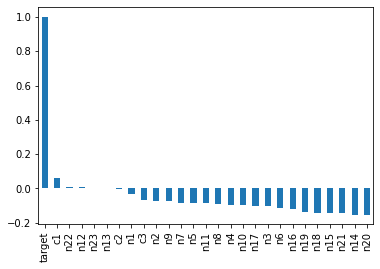

In [20]:
df[b].corr()['target'].sort_values(ascending = False).plot(kind='bar');

So all other columns except for 'c1', 'c2', 'c3' and 'target' are numerical.

In [23]:
numerical = list(df.columns.difference(['c1', 'c2', 'c3', 'target']))
df[numerical]

,n1,n10,n11,n12,n13,n14,n15,n16,n17,n18,...,n21,n22,n23,n3,n4,n5,n6,n7,n8,n9
0,83.74,24.83,9.60,0.0,0.0,36,7,0,0,36,...,7,0,0,181.48,24.83,9.60,0.00,0.00,24.83,9.60
1,1.46,211.78,28.98,0.0,0.0,57,18,5,6,52,...,18,0,0,92.11,211.78,28.98,5.75,13.85,206.03,15.13
2,0.00,48.13,77.22,0.0,0.0,64,24,18,6,46,...,24,0,0,763.19,48.13,77.22,9.33,4.90,38.80,72.32
3,117.49,127.67,49.30,0.0,0.0,148,57,4,1,142,...,57,0,0,1506.40,127.67,49.30,6.25,0.20,120.07,49.10
4,0.00,389.98,72.78,0.0,0.0,86,28,17,5,69,...,28,0,0,3493.18,389.98,72.78,16.72,4.28,373.27,68.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514004,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0,...,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
514005,0.00,0.00,0.12,0.0,0.0,0,1,0,1,0,...,1,0,0,0.00,0.00,0.12,0.00,0.12,0.00,0.00
514006,0.00,0.00,1.27,0.0,0.0,0,1,0,1,0,...,1,0,0,0.00,0.00,1.27,0.00,1.27,0.00,0.00
514007,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0,...,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Checking for the Imbalance


In [24]:
df.target.value_counts()

0    488665
1     25344
Name: target, dtype: int64

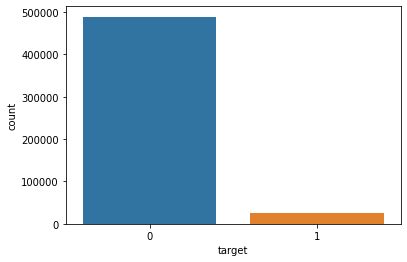

In [25]:
g = sns.countplot(df['target'])
g.set_xticklabels(['0','1'])
plt.show()

## Missing values

In [28]:
df.isnull().sum().sum()

0

In [29]:
# check for zeroes in columns
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  c1  is :  0
Count of zeros in column  c2  is :  0
Count of zeros in column  c3  is :  0
Count of zeros in column  n1  is :  325638
Count of zeros in column  n2  is :  170961
Count of zeros in column  n3  is :  230657
Count of zeros in column  n4  is :  100613
Count of zeros in column  n5  is :  35395
Count of zeros in column  n6  is :  153919
Count of zeros in column  n7  is :  119325
Count of zeros in column  n8  is :  122900
Count of zeros in column  n9  is :  52304
Count of zeros in column  n10  is :  100865
Count of zeros in column  n11  is :  35602
Count of zeros in column  n12  is :  508142
Count of zeros in column  n13  is :  507535
Count of zeros in column  n14  is :  100613
Count of zeros in column  n15  is :  35395
Count of zeros in column  n16  is :  153919
Count of zeros in column  n17  is :  119325
Count of zeros in column  n18  is :  122900
Count of zeros in column  n19  is :  52304
Count of zeros in column  n20  is :  100865
Count of zeros in co

Because the values of 0 in most of the columns are prevailing, we supposed that it is missing values.

In [30]:
df['target']=df['target'].replace(0, -1)

Function that replaces all zeroes with NaN values.

In [31]:
def replace_with0() :
    for i in numerical:
        df[i]=df[i].replace(0, np.nan)

replace_with0()

In [32]:
df['target']=df['target'].replace(-1, 0)

In [33]:
# Features with missing values
missing = df.isnull().sum().sort_values(ascending = False).head(20)
miss_percent = (missing/len(df))*100

# Percentage of missing values
pd.DataFrame({'missing values number': missing, '% of missing data': miss_percent.values})

,missing values number,% of missing data
n22,508142,98.858580
n12,508142,98.858580
n23,507535,98.740489
n13,507535,98.740489
n1,325638,63.352587
n3,230657,44.874117
n2,170961,33.260313
n6,153919,29.944806
n16,153919,29.944806
n8,122900,23.910087


As the number of missing values in the first 4 columns is greater than 90%, we can drop it.

In [34]:
df.drop(['n22', 'n12', 'n23', 'n13'], axis=1, inplace=True)

Number of unique values in all columns.

In [35]:
df.nunique()

c1        514009
c2            64
c3             3
n1         41279
n2        174053
n3        237937
n4         42916
n5         27572
n6          8138
n7          7536
n8         40538
n9         26503
n10        42914
n11        27551
n14          632
n15          414
n16          235
n17          224
n18          564
n19          329
n20          631
n21          415
target         2
dtype: int64

Because number of unique values in 'c1' columns is the same as row number, we can assume that it is just ID row, and drop it.

In [36]:
df.drop('c1', axis=1, inplace=True)

In [37]:
df.shape

(514009, 22)

### Analysing missing values

In [38]:
import missingno as mno

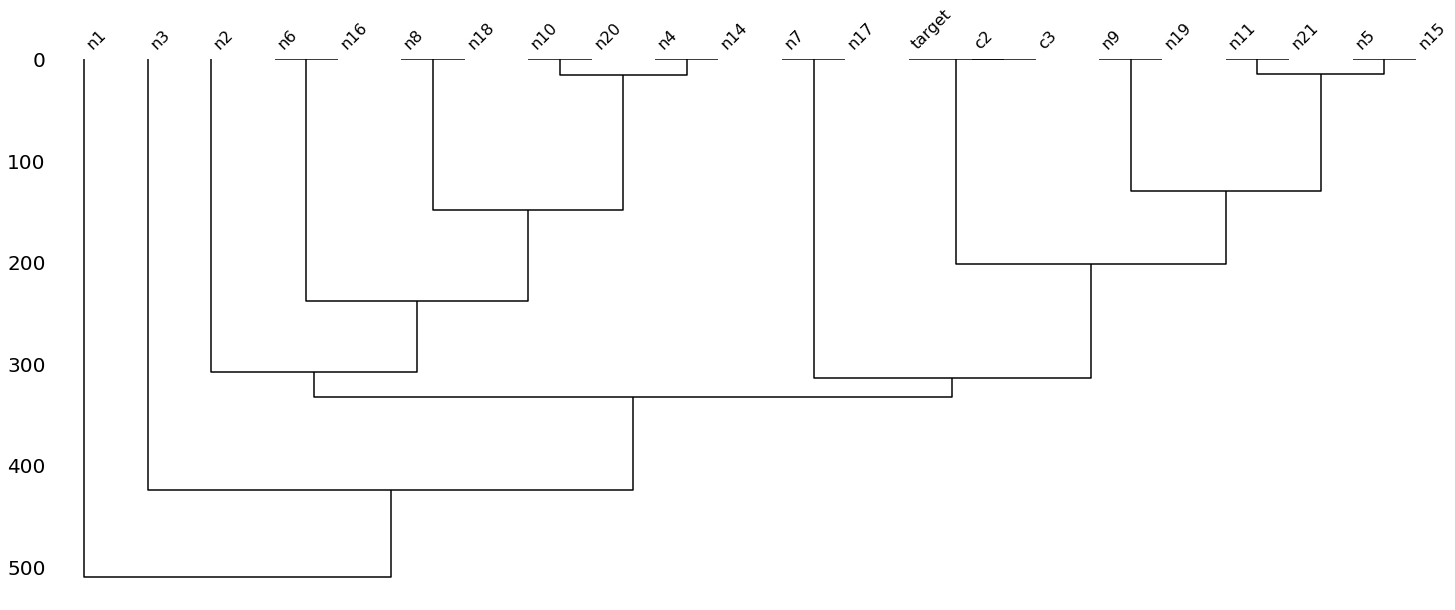

In [39]:
mno.dendrogram(df)

As we can see from the dendogram above most of the columns are inter-correlated.

## Filling missing values
### 'n11', 'n21' and 'n10' and 'n20' 
#### Multivariate feature imputation

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [44]:
cols = ['c2', 'n15', 'n14', 'c3', 'n5', 'n11', 'n21', 'n10', 'n20']
X = df[cols]
X

,c2,n15,n14,c3,n5,n11,n21,n10,n20
0,323531,7.0,36.0,33,9.60,9.60,7.0,24.83,36.0
1,343835,18.0,57.0,31,28.98,28.98,18.0,211.78,57.0
2,323531,24.0,64.0,33,77.22,77.22,24.0,48.13,64.0
3,343433,57.0,148.0,31,49.30,49.30,57.0,127.67,148.0
4,343835,28.0,86.0,31,72.78,72.78,28.0,389.98,86.0
...,...,...,...,...,...,...,...,...,...
514004,313339,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN
514005,313339,1.0,NaN,31,0.12,0.12,1.0,NaN,NaN
514006,343637,1.0,NaN,31,1.27,1.27,1.0,NaN,NaN
514007,313339,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN


In [45]:
impute_it = IterativeImputer(max_iter=10, random_state=42)
impute_it = impute_it.fit_transform(X)
k = pd.DataFrame(impute_it, columns=cols)
k.head()

,c2,n15,n14,c3,n5,n11,n21,n10,n20
0,323531.0,7.0,36.0,33.0,9.60,9.60,7.0,24.83,36.0
1,343835.0,18.0,57.0,31.0,28.98,28.98,18.0,211.78,57.0
2,323531.0,24.0,64.0,33.0,77.22,77.22,24.0,48.13,64.0
3,343433.0,57.0,148.0,31.0,49.30,49.30,57.0,127.67,148.0
4,343835.0,28.0,86.0,31.0,72.78,72.78,28.0,389.98,86.0


In [46]:
# # reset indexes in the dataframe
df.reset_index(inplace=True)
df.head()

,index,c2,c3,n1,n2,n3,n4,n5,n6,n7,...,n11,n14,n15,n16,n17,n18,n19,n20,n21,target
0,0,323531,33,83.74,3172.92,181.48,24.83,9.60,NaN,NaN,...,9.60,36.0,7.0,NaN,NaN,36.0,7.0,36.0,7.0,0
1,1,343835,31,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,...,28.98,57.0,18.0,5.0,6.0,52.0,12.0,57.0,18.0,0
2,2,323531,33,NaN,31.95,763.19,48.13,77.22,9.33,4.90,...,77.22,64.0,24.0,18.0,6.0,46.0,18.0,64.0,24.0,0
3,3,343433,31,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,...,49.30,148.0,57.0,4.0,1.0,142.0,56.0,148.0,57.0,0
4,4,343835,31,NaN,38.24,3493.18,389.98,72.78,16.72,4.28,...,72.78,86.0,28.0,17.0,5.0,69.0,23.0,86.0,28.0,0


In [47]:
extracted_col = k[['n11','n21','n10','n20']]
df = pd.merge(df, extracted_col, how = 'left', left_index = True, right_index = True)

In [48]:
df.drop(['n10_x', 'n11_x', 'n20_x', 'n21_x'], axis=1, inplace=True)

### 'n9', 'n19' and 'n8', 'n18'

In [49]:
cols = ['c2', 'n15', 'n14', 'c3', 'n5', 'n9', 'n19', 'n8', 'n18']
X = df[cols]
X

,c2,n15,n14,c3,n5,n9,n19,n8,n18
0,323531,7.0,36.0,33,9.60,9.60,7.0,24.83,36.0
1,343835,18.0,57.0,31,28.98,15.13,12.0,206.03,52.0
2,323531,24.0,64.0,33,77.22,72.32,18.0,38.80,46.0
3,343433,57.0,148.0,31,49.30,49.10,56.0,120.07,142.0
4,343835,28.0,86.0,31,72.78,68.50,23.0,373.27,69.0
...,...,...,...,...,...,...,...,...,...
514004,313339,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN
514005,313339,1.0,NaN,31,0.12,NaN,NaN,NaN,NaN
514006,343637,1.0,NaN,31,1.27,NaN,NaN,NaN,NaN
514007,313339,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN


In [50]:
impute_it = IterativeImputer(max_iter=10, random_state=42)
impute_it = impute_it.fit_transform(X)
k = pd.DataFrame(impute_it, columns=cols)
k.head()
extracted_col = k[['n9','n19','n8','n18']]
df = pd.merge(df, extracted_col, how = 'left', left_index = True, right_index = True)

In [51]:
df.drop(['n8_x', 'n9_x', 'n18_x', 'n19_x'], axis=1, inplace=True)

### 'n6','n16' and 'n7','n17'

In [52]:
cols = ['c2', 'n15', 'n14', 'c3', 'n5', 'n6', 'n16', 'n7', 'n17']
X = df[cols]
impute_it = IterativeImputer(max_iter=10, random_state=42)
impute_it = impute_it.fit_transform(X)
k = pd.DataFrame(impute_it, columns=cols)
k.head()
extracted_col = k[['n6','n16','n7','n17']]
df = pd.merge(df, extracted_col, how = 'left', left_index = True, right_index = True)

In [53]:
df.drop(['n6_x', 'n7_x', 'n16_x', 'n17_x'], axis=1, inplace=True)

### 'n4','n14' and 'n5','n15'

In [54]:
df.isnull().sum()

index          0
c2             0
c3             0
n1        325638
n2        170961
n3        230657
n4        100613
n5         35395
n14       100613
n15        35395
target         0
n11_y          0
n21_y          0
n10_y          0
n20_y          0
n9_y           0
n19_y          0
n8_y           0
n18_y          0
n6_y           0
n16_y          0
n7_y           0
n17_y          0
dtype: int64

In [55]:
cols = ['c2','n6_y','n11_y','n21_y','c3', 'n4', 'n14', 'n5', 'n15']
X = df[cols]
impute_it = IterativeImputer(max_iter=10, random_state=42)
impute_it = impute_it.fit_transform(X)
k = pd.DataFrame(impute_it, columns=cols)
k.head()
extracted_col = k[['n4','n14','n5','n15']]
df = pd.merge(df, extracted_col, how = 'left', left_index = True, right_index = True)

In [56]:
df.drop(['n4_x', 'n14_x', 'n5_x', 'n15_x'], axis=1, inplace=True)

### 'n1', 'n2' and 'n3'
#### 'n2' column

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()
list1=['n1', 'n2', 'n3', 'target']
testdf = df[df['n2'].isnull()==True]
traindf = df[df['n2'].isnull()==False]
y = traindf['n2']
traindf.drop(columns=list1,axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(columns=list1,axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['n2']= pred

In [59]:
df_out = pd.merge(traindf,y,how = 'left',left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf]
result = pd.concat(frames)
df = pd.merge(df,result['n2'], how = 'left',left_index = True, right_index = True) 

In [60]:
df.drop('n2_x', axis=1, inplace=True)

#### 'n3' column

In [61]:
lr = LinearRegression()
list1=['n1', 'n3', 'target']
testdf = df[df['n3'].isnull()==True]
traindf = df[df['n3'].isnull()==False]
y = traindf['n3']
traindf.drop(columns=list1,axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(columns=list1,axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['n3']= pred
df_out = pd.merge(traindf,y,how = 'left',left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf]
result = pd.concat(frames)
df = pd.merge(df,result['n3'], how = 'left',left_index = True, right_index = True) 

In [62]:
df.drop('n3_x', axis=1, inplace=True)

#### 'n1' column

In [63]:
lr = LinearRegression()
list1=['n1','target']
testdf = df[df['n1'].isnull()==True]
traindf = df[df['n1'].isnull()==False]
y = traindf['n1']
traindf.drop(columns=list1,axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(columns=list1,axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['n1']= pred
df_out = pd.merge(traindf,y,how = 'left',left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf]
result = pd.concat(frames)
df = pd.merge(df,result['n1'], how = 'left',left_index = True, right_index = True) 

In [64]:
df.drop('n1_x', axis=1, inplace=True)

In [65]:
df.isnull().sum()

index     0
c2        0
c3        0
target    0
n11_y     0
n21_y     0
n10_y     0
n20_y     0
n9_y      0
n19_y     0
n8_y      0
n18_y     0
n6_y      0
n16_y     0
n7_y      0
n17_y     0
n4_y      0
n14_y     0
n5_y      0
n15_y     0
n2_y      0
n3_y      0
n1_y      0
dtype: int64

In [66]:
df.astype(int)

,index,c2,c3,target,n11_y,n21_y,n10_y,n20_y,n9_y,n19_y,...,n16_y,n7_y,n17_y,n4_y,n14_y,n5_y,n15_y,n2_y,n3_y,n1_y
0,0,323531,33,0,9,7,24,36,9,7,...,11,6,3,24,36,9,7,3172,181,83
1,1,343835,31,0,28,18,211,57,15,12,...,5,13,6,211,57,28,18,1273,92,1
2,2,323531,33,0,77,24,48,64,72,18,...,18,4,6,48,64,77,24,31,763,108
3,3,343433,31,0,49,57,127,148,49,56,...,4,0,1,127,148,49,57,529,1506,117
4,4,343835,31,0,72,28,389,86,68,23,...,17,4,5,389,86,72,28,38,3493,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514004,514004,313339,31,1,67,31,137,61,56,22,...,12,11,8,120,55,67,31,1186,4429,109
514005,514005,313339,31,0,0,1,163,61,0,1,...,7,0,1,48,17,0,1,474,1854,38
514006,514006,343637,31,0,1,1,165,61,0,1,...,8,1,1,55,19,1,1,541,2153,40
514007,514007,313339,31,1,67,31,137,61,56,22,...,12,11,8,120,55,67,31,1186,4429,109


In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [68]:
print('X shape\t\t:', X.shape)
print('y shape\t\t:', y.shape)
print()
print('X_train shape\t:', X_train.shape)
print('y_train shape\t:', y_train.shape)
print()
print('X_test shape\t:', X_test.shape)
print('y_test shape\t:', y_test.shape)

X shape		: (514009, 22)
y shape		: (514009,)

X_train shape	: (359806, 22)
y_train shape	: (359806,)

X_test shape	: (154203, 22)
y_test shape	: (154203,)


In [69]:
df.drop('index', axis=1, inplace=True)

## Dealing with imbalance
### SMOTE (Synthetic Minority Oversampling Technique) – Oversampling

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.<br>
It aims to balance class distribution by randomly increasing minority class examples by replicating them.<br>
SMOTE synthesises new minority instances between existing minority instances. <br>It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

oversample = SMOTE(random_state=1)
X_train, y_train = oversample.fit_resample(X_train, y_train)

print('After Over-sampling, the shape of X_train: {}'.format(X_train.shape))
print('After Over-sampling, the shape of y_train: {} \n'.format(y_train.shape))

print("After Over-sampling, label '1' count: {}".format(sum(y_train==1)))
print("After Over-sampling, label '0' count: {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 17741
Before OverSampling, counts of label '0': 342065 

After Over-sampling, the shape of X_train: (684130, 22)
After Over-sampling, the shape of y_train: (684130,) 

After Over-sampling, label '1' count: 342065
After Over-sampling, label '0' count: 342065


### Standartization

In [72]:
numerical = [col for col in df if col.startswith('n')]
numerical

['n11_y',
 'n21_y',
 'n10_y',
 'n20_y',
 'n9_y',
 'n19_y',
 'n8_y',
 'n18_y',
 'n6_y',
 'n16_y',
 'n7_y',
 'n17_y',
 'n4_y',
 'n14_y',
 'n5_y',
 'n15_y',
 'n2_y',
 'n3_y',
 'n1_y']

Standartizing only numerical variables, and don't touch categorical.

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(df[numerical])

array([[-5.86800527e-01, -8.01455117e-01, -5.93948915e-01, ...,
         8.47128367e-01, -1.07332027e+00, -1.49360048e-01],
       [-3.89892478e-01, -4.37371539e-01,  3.77913410e-01, ...,
        -2.03320410e-02, -1.09401628e+00, -5.11895624e-01],
       [ 1.00243967e-01, -2.38780497e-01, -4.72823523e-01, ...,
        -5.87631890e-01, -9.38609739e-01, -4.10935096e-02],
       ...,
       [-6.71436443e-01, -1.00004616e+00,  1.37569989e-01, ...,
        -3.55072319e-01, -6.16697443e-01, -3.40562505e-01],
       [ 2.72626778e-05, -5.81137825e-05, -6.13818303e-03, ...,
        -6.00265497e-02, -8.95977829e-02, -3.46951765e-02],
       [ 3.54300837e-05, -5.58976800e-05,  1.17388372e-03, ...,
        -3.03099087e-02, -1.47504518e-02, -2.63468590e-02]])

# Models

In [74]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import plot_roc_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


def modeling1(alg, params={}):
    # Instantiating the algorithm class and unpacking parameters if any
    model = alg(**params) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred) )
    
    def print_scores(alg, y_true, y_pred):
        print(F'Accuracy:', round(accuracy_score(y_true, y_pred),2))
        print(F'Precision:', round(precision_score(y_true, y_pred), 2))
        print(F'Recall:', round(recall_score(y_true, y_pred), 2))
        print(F'F1 Score:', round(f1_score(y_true, y_pred), 2))
        print()
    print_scores(alg, y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'notChurn'])

    # The plot() function has to be called for the sklearn visualization
    cmd_obj.plot()

    # Use the Axes attribute 'ax_' to get to the underlying Axes object.
    # The Axes object controls the labels for the X and the Y axes. It also controls the title.
    cmd_obj.ax_.set(
                    title='Confusion Matrix with labels', 
                    xlabel='Predicted Churn', 
                    ylabel='Actual Churn')
    # Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
    plt.show()

    # Create the Confusion Matrix Display Object(cmd_obj). 
    print('Confusion matrix:')
    print(cm)


    fig, ((axes1,axes2)) = plt.subplots(1,2, figsize=(15,5))
    plot_roc_curve(model, X_test, y_test, ax=axes1)
    axes1.set_title('ROC Curve')
    axes1.plot([0, 1], [0, 1], 'r--')
    # plt.show()

    plot_precision_recall_curve(model, X_test, y_test, ax = axes2)
    axes2.set_title('Precision-Recall curve')
    plt.show()
    
    return model

## Logistic Regression Feature importance

In [76]:
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression

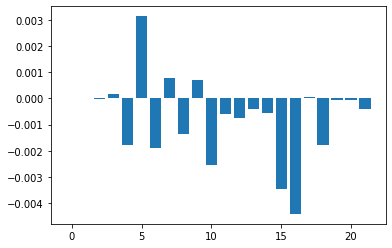

In [77]:
model = LogisticRegression()
model.fit(X_train, y_train)
importance = model.coef_[0]
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [78]:
dff= pd.DataFrame(importance, [x for x in range(len(importance))])
dff['columns']= X_train.columns
dff.sort_values('columns')

,0,columns
1,2.303977e-06,c2
2,-4.394578e-05,c3
0,1.529609e-07,index
5,3.133145e-03,n10_y
3,1.542338e-04,n11_y
16,-4.411883e-03,n14_y
18,-1.790223e-03,n15_y
12,-7.357489e-04,n16_y
14,-5.606365e-04,n17_y
10,-2.541865e-03,n18_y


As we can see from the above, the most important variables are 'c2', 'c3' and so on.

### Interpretation

In [79]:
import statsmodels.api as sm 

model = sm.Logit(endog=y_train, exog=X_train).fit()
# output message
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.637809
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               684130
Model:                          Logit   Df Residuals:                   684108
Method:                           MLE   Df Model:                           21
Date:                Wed, 25 May 2022   Pseudo R-squ.:                 0.07984
Time:                        07:01:37   Log-Likelihood:            -4.3634e+05
converged:                       True   LL-Null:                   -4.7420e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
index       2.967e-07   1.72e-08     17.272      0.000    2.63e-07     3.3e-07
c2          3.186e-06   5.39e

The p values for all independent variables are significant, and are supposed to be highly associated with the target variable, except 'n8_y'.<br>
Pseudo R-square  also known as McFadden's R2 index measures the improvement in model likelihood over the null model. <br>The closer this value to 1, the better fitted model is.

In [80]:
np.exp(model.params)

index    1.000000
c2       1.000003
c3       0.971469
n11_y    1.070293
n21_y    0.739896
n10_y    1.038180
n20_y    0.935350
n9_y     1.076452
n19_y    0.878261
n8_y     1.000038
n18_y    1.008264
n6_y     0.998107
n16_y    1.012307
n7_y     1.075363
n17_y    0.876537
n4_y     0.963145
n14_y    1.051875
n5_y     0.867921
n15_y    1.545102
n2_y     0.999954
n3_y     0.999966
n1_y     0.999812
dtype: float64

The above piece of code gets odds ratio. That for instance means, the column 'n11_y' has OR of 1.07, which suggests that for one unit increase in 'n11_y', we expect that about 1.07 times increase the odds of customer to churn, while all other variables will be constant.

## Logistic Regression

              precision    recall  f1-score   support

           0       0.95      0.53      0.68    146600
           1       0.05      0.49      0.09      7603

    accuracy                           0.53    154203
   macro avg       0.50      0.51      0.39    154203
weighted avg       0.91      0.53      0.65    154203

Accuracy: 0.53
Precision: 0.05
Recall: 0.49
F1 Score: 0.09



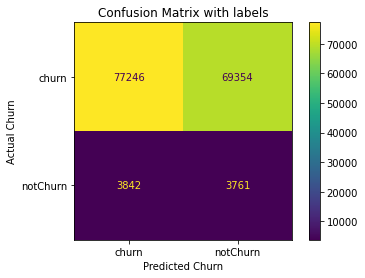

Confusion matrix:
[[77246 69354]
 [ 3842  3761]]


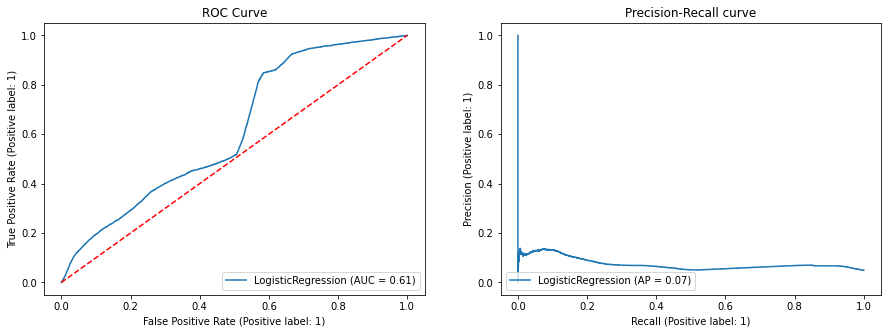

In [81]:
logreg = modeling1(LogisticRegression)

A model with higher AUC has higher predictability. <br>
AUC refers to the probability that randomly chosen customer that is not going to churn will have high chances of classification as going not to churn than randomly chosen customer that churns.

### Logistic Regression Hyperparameter tuning 

In [82]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)

print("best parameters: ",logreg_cv.best_params_)

best parameters:  {'C': 0.001, 'penalty': 'l2'}


In [83]:
logparams = {
    'C': 0.001, 
    'penalty': 'l2'
}

              precision    recall  f1-score   support

           0       0.95      0.54      0.69    146600
           1       0.05      0.49      0.09      7603

    accuracy                           0.54    154203
   macro avg       0.50      0.51      0.39    154203
weighted avg       0.91      0.54      0.66    154203

Accuracy: 0.54
Precision: 0.05
Recall: 0.49
F1 Score: 0.09



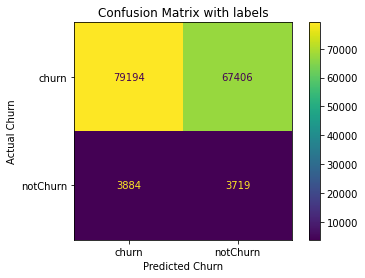

Confusion matrix:
[[79194 67406]
 [ 3884  3719]]


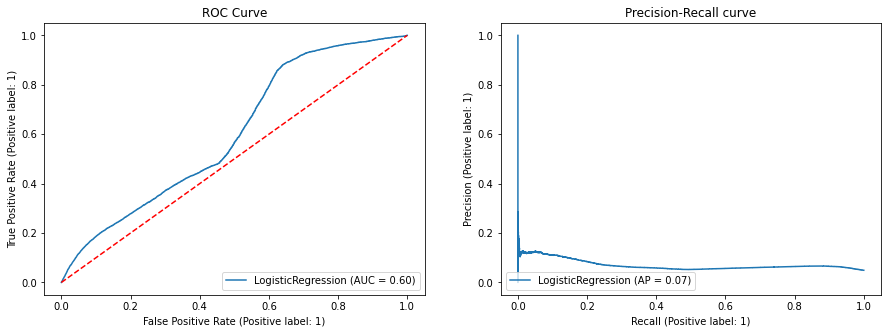

In [84]:
log_cv=modeling1(LogisticRegression, params=logparams)

## Decision Tree Feature Importance
Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

This same approach can be used for ensembles of decision trees, such as the random forest and stochastic gradient boosting algorithms.

In [85]:
from sklearn.tree import DecisionTreeClassifier

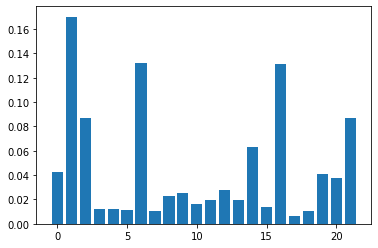

In [86]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
importance = model1.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [87]:
dff= pd.DataFrame(importance, [x for x in range(len(importance))])
dff['columns']= X_train.columns
dff.sort_values('columns')

,0,columns
1,0.170231,c2
2,0.087004,c3
0,0.042336,index
5,0.011427,n10_y
3,0.012553,n11_y
16,0.131484,n14_y
18,0.010251,n15_y
12,0.027517,n16_y
14,0.063086,n17_y
10,0.016548,n18_y


## Decision Tree

              precision    recall  f1-score   support

           0       0.96      0.92      0.94    146600
           1       0.19      0.35      0.25      7603

    accuracy                           0.90    154203
   macro avg       0.58      0.64      0.60    154203
weighted avg       0.93      0.90      0.91    154203

Accuracy: 0.9
Precision: 0.19
Recall: 0.35
F1 Score: 0.25



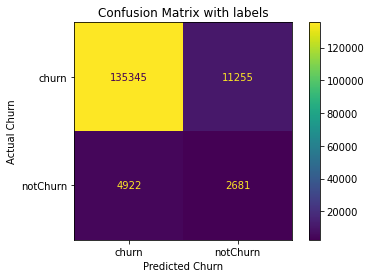

Confusion matrix:
[[135345  11255]
 [  4922   2681]]


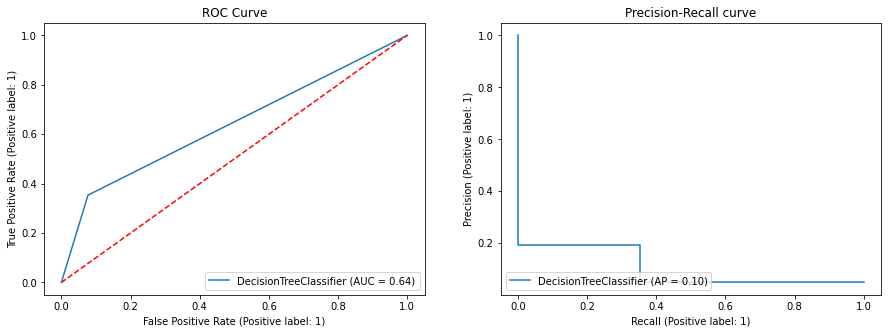

In [90]:
tree = modeling1(DecisionTreeClassifier)

### Decision Tree Hyperparameter tuning

In [ ]:
tree_params = {"max_depth": range(1, 30), "max_features": range(1, 601, 50)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

In [ ]:
tree_grid.best_params_

In [93]:
params = {
    'max_depth': 29, 
    'max_features': 1
}

              precision    recall  f1-score   support

           0       0.97      0.86      0.91    146600
           1       0.14      0.47      0.22      7603

    accuracy                           0.84    154203
   macro avg       0.56      0.66      0.56    154203
weighted avg       0.93      0.84      0.88    154203

Accuracy: 0.84
Precision: 0.14
Recall: 0.47
F1 Score: 0.22



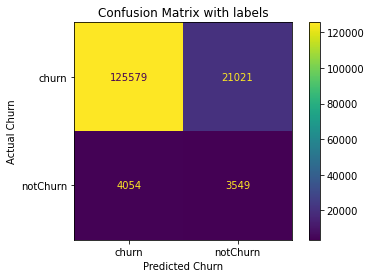

Confusion matrix:
[[125579  21021]
 [  4054   3549]]


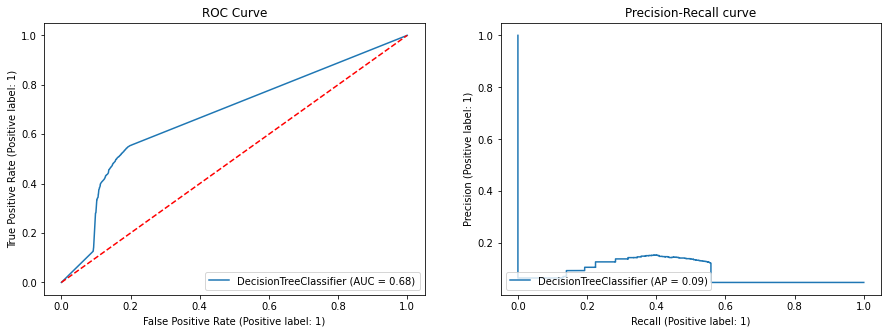

In [94]:
treecv=modeling1(DecisionTreeClassifier, params=params)

## Random Forest Feature importance

We can use the Random Forest algorithm for feature importance implemented in scikit-learn as the RandomForestRegressor and RandomForestClassifier classes.

After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.

This approach can also be used with the bagging and extra trees algorithms.

In [95]:
from sklearn.ensemble import RandomForestClassifier

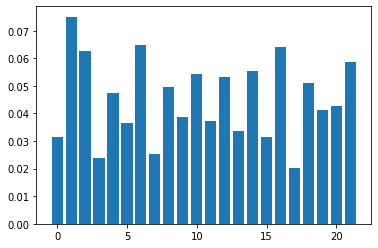

In [96]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
importance = model2.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

This is feature importance using Random Forest Classifier.

In [97]:
dff= pd.DataFrame(importance, [x for x in range(len(importance))])
dff['columns']= X_train.columns
dff.sort_values('columns')

,0,columns
1,0.075084,c2
2,0.062710,c3
0,0.031567,index
5,0.036643,n10_y
3,0.023947,n11_y
16,0.064267,n14_y
18,0.050880,n15_y
12,0.053125,n16_y
14,0.055579,n17_y
10,0.054290,n18_y


### Random Forest

In [109]:
params ={
    'n_estimators': 50
}

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    146600
           1       0.40      0.30      0.34      7603

    accuracy                           0.94    154203
   macro avg       0.68      0.64      0.65    154203
weighted avg       0.94      0.94      0.94    154203

Accuracy: 0.94
Precision: 0.4
Recall: 0.3
F1 Score: 0.34



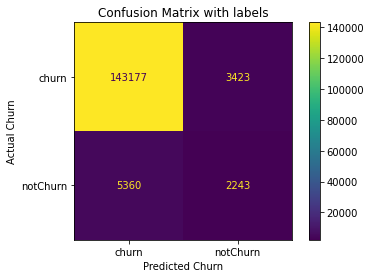

Confusion matrix:
[[143177   3423]
 [  5360   2243]]


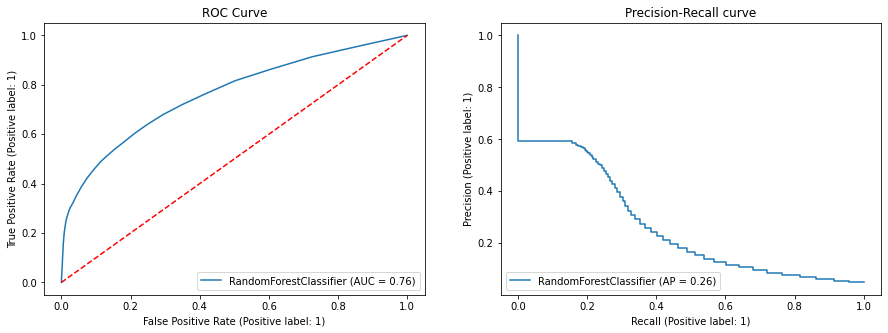

In [110]:
forest = modeling1(RandomForestClassifier, params)

### Random Forest Hyperparameter tuning

In [117]:
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 50, num = 10)]

param_grid = { 
              'n_estimators': n_estimators, # Number of trees in random forest
               'max_features': ['sqrt'], # Number of features to consider at every split
               'max_depth': [2,4], # Maximum number of levels in tree
               'min_samples_split': [2, 4], # Minimum number of samples required to split a node
               'min_samples_leaf': [1, 2], # Minimum number of samples required at each leaf node
               'bootstrap': [True, False] # Method of selecting samples for training each tree
}

In [ ]:
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid.fit(X_train, y_train)

In [ ]:
rf_Grid.best_params_

In [122]:
rf_params = {
    'bootstrap': True,
    'max_depth': 4,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 41
}

              precision    recall  f1-score   support

           0       0.98      0.84      0.90    146600
           1       0.17      0.65      0.27      7603

    accuracy                           0.83    154203
   macro avg       0.57      0.74      0.59    154203
weighted avg       0.94      0.83      0.87    154203

Accuracy: 0.83
Precision: 0.17
Recall: 0.65
F1 Score: 0.27



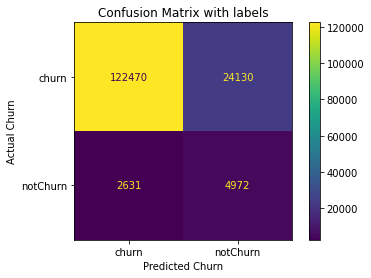

Confusion matrix:
[[122470  24130]
 [  2631   4972]]


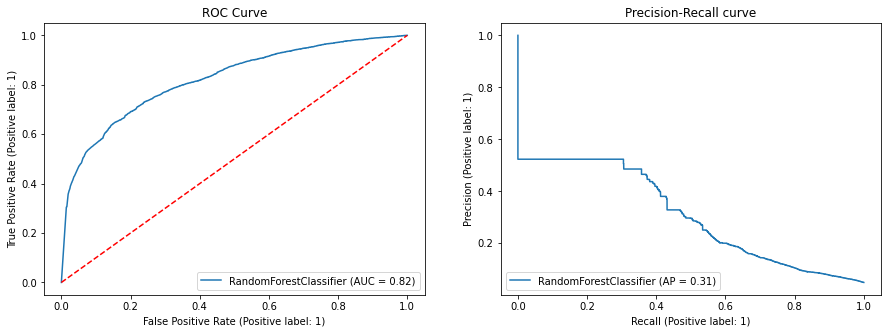

In [123]:
rf_cv = modeling1(RandomForestClassifier,params = rf_params)

## XGBoost Feature Importance


XGBoost is a library that provides an efficient and effective implementation of the stochastic gradient boosting algorithm.

This algorithm can be used with scikit-learn via the XGBRegressor and XGBClassifier classes.

After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.

In [124]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
from xgboost import XGBClassifier

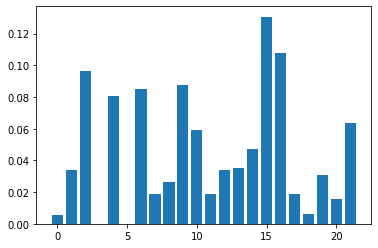

In [126]:
model = XGBClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [127]:
dff= pd.DataFrame(importance, [x for x in range(len(importance))])
dff['columns']= X_train.columns
dff.sort_values('columns')

,0,columns
1,0.033636,c2
2,0.096258,c3
0,0.005521,index
5,0.000000,n10_y
3,0.000000,n11_y
16,0.107738,n14_y
18,0.006044,n15_y
12,0.034239,n16_y
14,0.047138,n17_y
10,0.058942,n18_y


## XGBoost

              precision    recall  f1-score   support

           0       0.98      0.89      0.93    146600
           1       0.21      0.57      0.31      7603

    accuracy                           0.88    154203
   macro avg       0.59      0.73      0.62    154203
weighted avg       0.94      0.88      0.90    154203

Accuracy: 0.88
Precision: 0.21
Recall: 0.57
F1 Score: 0.31



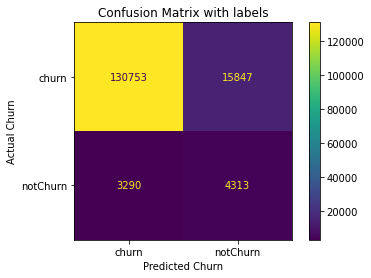

Confusion matrix:
[[130753  15847]
 [  3290   4313]]


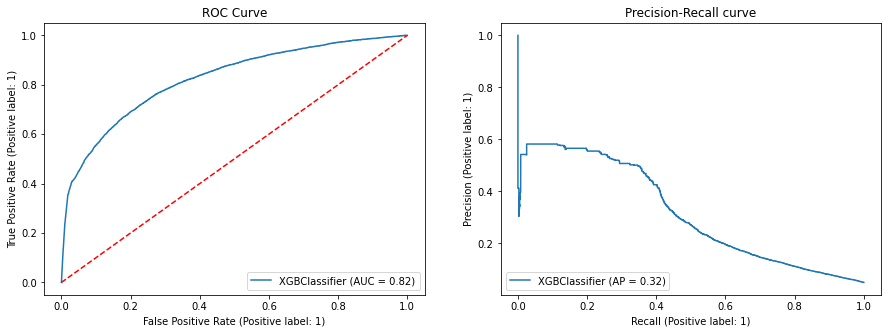

In [128]:
xgb = modeling1(XGBClassifier)

### XGBoost Hyperparameter tuning

In [129]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 180, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [130]:
grid_search = GridSearchCV(estimator=estimator,param_grid=parameters,scoring = 'roc_auc',n_jobs = 10,cv = 10,verbose=True)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

In [132]:
xgb_params = {
              'max_depth' : 4, 
              'n_estimators' : 180, 
              'nthread' : 4
}

              precision    recall  f1-score   support

           0       0.97      0.94      0.96    146600
           1       0.31      0.49      0.38      7603

    accuracy                           0.92    154203
   macro avg       0.64      0.71      0.67    154203
weighted avg       0.94      0.92      0.93    154203

Accuracy: 0.92
Precision: 0.31
Recall: 0.49
F1 Score: 0.38



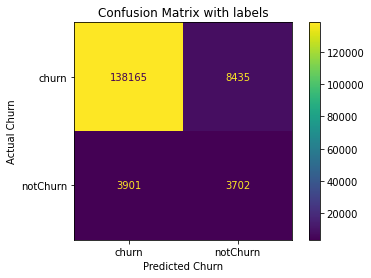

Confusion matrix:
[[138165   8435]
 [  3901   3702]]


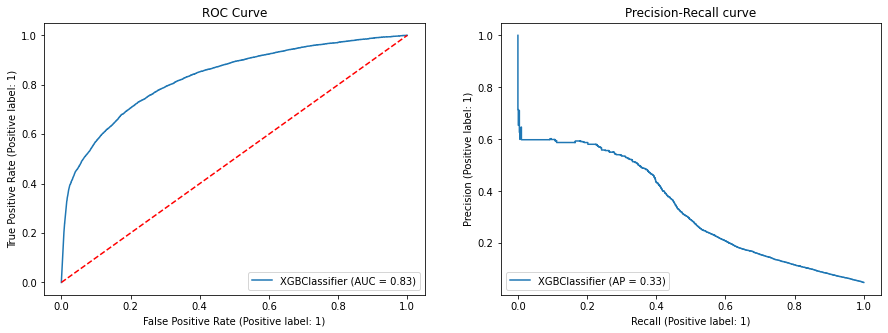

In [133]:
xgb_cv = modeling1(XGBClassifier, params = xgb_params)

## Permutation Feature Importance for Classification

Permutation feature importance is a technique for calculating relative importance scores that is independent of the model used.

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
results = permutation_importance(model, X, y, scoring='accuracy')
importance = results.importances_mean
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
dff= pd.DataFrame(importance, [x for x in range(len(importance))])
dff['columns']= X_train.columns
dff.sort_values('columns')

## KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = modeling1(KNeighborsClassifier)

## LGBM

In [142]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    146600
           1       0.40      0.44      0.42      7603

    accuracy                           0.94    154203
   macro avg       0.68      0.70      0.69    154203
weighted avg       0.94      0.94      0.94    154203

Accuracy: 0.94
Precision: 0.4
Recall: 0.44
F1 Score: 0.42



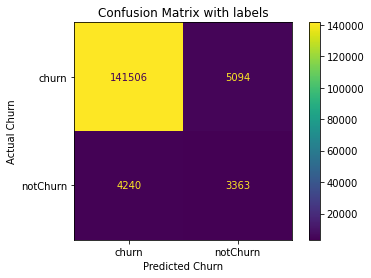

Confusion matrix:
[[141506   5094]
 [  4240   3363]]


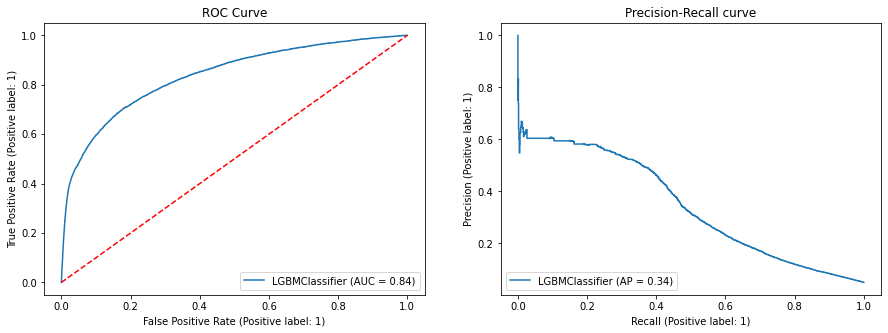

In [144]:
lgbm = modeling1(lgb.LGBMClassifier)

## Linear Discriminant Analysis

In [157]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

              precision    recall  f1-score   support

           0       0.98      0.58      0.73    146600
           1       0.09      0.78      0.16      7603

    accuracy                           0.59    154203
   macro avg       0.53      0.68      0.44    154203
weighted avg       0.94      0.59      0.70    154203

Accuracy: 0.59
Precision: 0.09
Recall: 0.78
F1 Score: 0.16



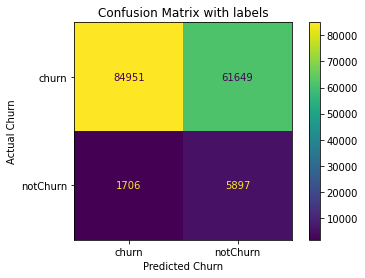

Confusion matrix:
[[84951 61649]
 [ 1706  5897]]


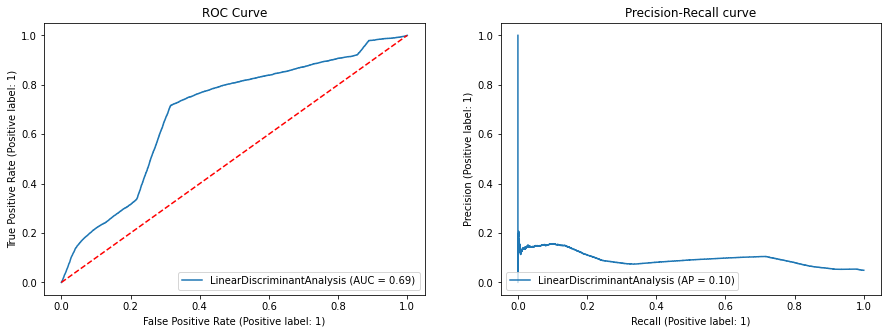

In [158]:
lda = modeling1(LDA)

## Conclusion

Customer churn, or attrition, is the rate at which clients opt out of purchasing more of a company’s products or services. 

__Why we need to predict churn?__

It might be several times more expensive to acquire new consumers than it is to sell to existing clients. Understanding what causes churn and why customers leave is essential for strong retention rates. The ability to effectively identify clients who are at high risk of churning may aid us in developing appropriate marketing strategies and retaining customers.

That is why, it is important to understand which features affect on our target variable. We have used feature selection using different models to see it.

<Figure size 1080x360 with 0 Axes>

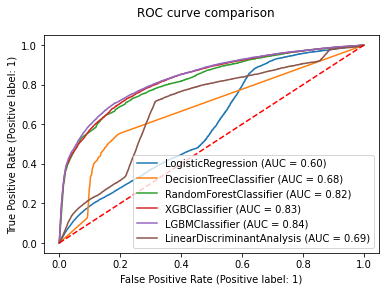

In [159]:
plt.figure(figsize=(15, 5))

fig = plot_roc_curve(log_cv, X_test, y_test)
fig = plot_roc_curve(treecv, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(rf_cv, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(xgb_cv, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(lgbm, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(lda, X_test, y_test, ax = fig.ax_)
fig.figure_.suptitle("ROC curve comparison")
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

For business interpratation some models are hard to interpret, such as LDA.

### Precision-Recall curves

Text(0.5, 1.0, 'Precision-Recall curve')

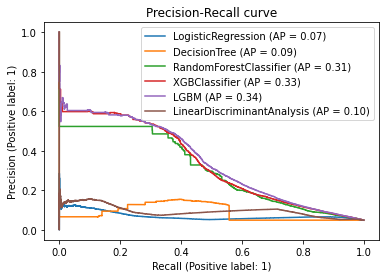

In [160]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(log_cv, X_test, y_test, ax = plt.gca(),name = "LogisticRegression")
plot_precision_recall_curve(treecv, X_test, y_test, ax = plt.gca(),name = "DecisionTree")
plot_precision_recall_curve(rf_cv, X_test, y_test, ax = plt.gca(),name = "RandomForestClassifier")
plot_precision_recall_curve(xgb_cv, X_test, y_test, ax = plt.gca(),name = "XGBClassifier")
plot_precision_recall_curve(lgbm, X_test, y_test, ax = plt.gca(),name = "LGBM")
plot_precision_recall_curve(lda, X_test, y_test, ax = plt.gca(),name = "LinearDiscriminantAnalysis")

plt.legend(loc="upper right")
plt.title('Precision-Recall curve')

## Analysis

The best precision and recall curve indicator and AUC score are both in LGBM model.

What about the feature importance, we have idendified the importance of features using 

- Decision Tree
- Logistic Regression
- Random Forest
- XGBoost

and all of them showed the same results.

We also wanted to use feature selection using KNN model, however it was running too slow.